## Overview:
For this assignment, you will work with a provided dataset to train and utilize multiple classifiers to analyze different versions of the dataset. In addition to implementing these classifiers, you will also explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. Finally, you will be expected to answer some conceptual questions based on your observations and analysis.

## Data Set:
In this assignment, you will work with multiple versions of one dataset called "Amphibians." It is adopted from a famous public dataset, and you can find more details about it <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>.  The dataset includes information about five groups of amphibians in Poland: "Green frogs," "Brown frogs," "Common toad," "Tree frog," and "Fire-bellied toad." The dataset comprises 14 attributes and one class. Some of these attributes are numeric, some are categorical, and some are ordinal.

You can find details about all the features in the dataset in the file "README.txt".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1 [5 marks]
**Q1.1 A.** Read the dataset "amphibians1.csv" dataset into a pandas DataFrame called `data1`. Create a function called `encode` that takes in the features of the dataset as a pandas DataFrame and uses one-hot encoding to convert all nominal (and ordinal) attributes to numeric. You can achieve this by either using `get_dummies()` from the pandas library or `OneHotEncoder()` from the scikit-learn library. **[1 mark]**

**B.** For 10 rounds, use `train_test_split` to divide the encoded `data1` into 70% train, 30% test . Set the `random_state` equal to the loop counter. For example in the loop
``` python 
for i in range(10):
```
make `random_state` equal to `i`. 
Use the splitted datasets to train and test the following models (use the default hyperparameters): **[1 mark]**
- Zero-R
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Bernoulli Naive Bayes model

Report the average accuracy over the 10 runs.

In [4]:
data1 = pd.read_csv("amphibians1.csv")

y1 = data1.iloc[:, -1]
X1 = data1.iloc[:, :-1]

In [5]:
# preprocessing 
def encode(X):
    # your code here
    X  = pd.get_dummies(X)
    return X

In [6]:
ZeroR_Acc_1 = []
GNB_Acc_1 = []
MNB_Acc_1 = []
BNB_Acc_1 = []

# your code here

X = encode(X1)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y1,test_size=0.3,random_state=i)
    
    ZeroR_clf = DummyClassifier(strategy="most_frequent")
    ZeroR_clf.fit(X_train, y_train)
    y_pred = ZeroR_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ZeroR_cr = classification_report(y_test, y_pred,zero_division=1)
    ZeroR_Acc_1.append(acc)
    
    GNB_clf = GaussianNB()
    GNB_clf.fit(X_train, y_train)
    y_pred = GNB_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    GNB_cr = classification_report(y_test, y_pred,zero_division=1)
    GNB_Acc_1.append(acc)
    
    MNB_clf = MultinomialNB()
    MNB_clf.fit(X_train, y_train)
    y_pred = MNB_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    MNB_cr = classification_report(y_test, y_pred,zero_division=1)
    MNB_Acc_1.append(acc)
     
    BNB_clf = BernoulliNB()
    BNB_clf.fit(X_train, y_train)
    y_pred = BNB_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    BNB_cr = classification_report(y_test, y_pred,zero_division=1)
    BNB_Acc_1.append(acc)
    
print("Accuracy of ZeroR:", np.mean(ZeroR_Acc_1).round(2))
print("Accuracy of GNB:", np.mean(GNB_Acc_1).round(2))
print("Accuracy of MNB:", np.mean(MNB_Acc_1).round(2))
print("Accuracy of BNB:", np.mean(BNB_Acc_1).round(2))


Accuracy of ZeroR: 0.59
Accuracy of GNB: 0.42
Accuracy of MNB: 0.33
Accuracy of BNB: 0.57


**Q1.2** After comparing the performance of the different models on the classification task, please comment on any differences or lack of differences you observe between the models. **[3 marks]**</br>
*NOTE: You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [7]:
print('ZeroR_cr\n',ZeroR_cr)
print('GNB_cr\n',GNB_cr)
print('MNB_cr\n',MNB_cr)
print('BNB_cr\n',BNB_cr)

ZeroR_cr
                    precision    recall  f1-score   support

       Brown frog       1.00      0.00      0.00        18
      Common toad       1.00      0.00      0.00         2
Fire-bellied toad       1.00      0.00      0.00         1
       Green frog       0.59      1.00      0.74        32
        Tree frog       1.00      0.00      0.00         1

         accuracy                           0.59        54
        macro avg       0.92      0.20      0.15        54
     weighted avg       0.76      0.59      0.44        54

GNB_cr
                    precision    recall  f1-score   support

       Brown frog       0.32      0.33      0.32        18
      Common toad       0.12      0.50      0.20         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.75      0.38      0.50        32
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.35        54
        macro avg       0.24     

*Answer Here*
- ZeroR and BernoulliNB is not predicting anything for 3 frog classes, although other two model is not working for just 2 classes
- Also, no model is working for Tree and Fire-bellied toad frog classes


## Question 2 [5 marks]

**Q2.1.** Divide the `data1` into 70% train and 30% test splits for 10 rounds, set the `random_state` equal to the loop counter. Then, train and test **K-Nearest Neighbor algorithms (with K values of 1, 5, and 20)**, using Euclidean distance as the distance metric and maximum vote (no weighting) to determine the label. Finally, report the average accuracy of the KNN models over the 10 runs. **[1 mark]**

In [8]:
KNN1_Acc_1 = []
KNN5_Acc_1 = []
KNN20_Acc_1 = []

# your code here

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y1,test_size=0.3,random_state=i)
    
    knn_clf = KNeighborsClassifier(n_neighbors=1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN1_Acc_1.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN5_Acc_1.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=20)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN20_Acc_1.append(acc)
            
print("Accuracy of KNN(1):", np.mean(KNN1_Acc_1).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_1).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_1).round(2))


Accuracy of KNN(1): 0.59
Accuracy of KNN(5): 0.61
Accuracy of KNN(20): 0.63


**Q2.2.A.** Create a function called `normalise` that takes the features of the dataset as a pandas DataFrame and scales all numeric attributes to the range of 0-1. You can either use `MinMaxScaler` from the `sklearn.preprocessing` library or implement the normalization step yourself.
**B.** For 10 rounds divide the normalised "data1" into 70% train and 30% test splits using set the `random_state` equal to the loop counter, and run the KNN models (k=1,5 and 20). Report the average accuracy of your KNN models over these 10 runs. **[1 mark]**

In [9]:
from sklearn.preprocessing import MinMaxScaler
# preprocessing 
def normalise(X):
    # your code here
    sc = MinMaxScaler()
    X = sc.fit_transform(X)
    return X

In [10]:
######################################## POSSIBLE SOLUTION #############################################

KNN1_Acc_2 = []
KNN5_Acc_2 = []
KNN20_Acc_2 = []

# your code here

X = normalise(X)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y1,test_size=0.3,random_state=i)
    
    knn_clf = KNeighborsClassifier(n_neighbors=1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN1_Acc_2.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN5_Acc_2.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=20)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN20_Acc_2.append(acc)


print("Accuracy of KNN(1):", np.mean(KNN1_Acc_2).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_2).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_2).round(2))


Accuracy of KNN(1): 0.56
Accuracy of KNN(5): 0.62
Accuracy of KNN(20): 0.62


**Q2.3** Compare the results of the KNN models (for each value of K) in Q2.1 and Q2.2, and discuss any differences you observe. Did the preprocessing step in Q2.2 improve the performance of the KNN models? Why or why not? **[3 marks]**

*Answer Here*

- for K=1 and 20, value is getting decreased because those K is not the optimal one, but K=5 is near optimal number of Neighbors (i.e 7 here, as shown using below Elbow method) , therefore its getting increased to 62%
- Code for how to get optimal K has been written below using Elbow Method

  0%|          | 0/18 [00:00<?, ?it/s]

Minimum error:- 0.35185185185185186 at k= 7


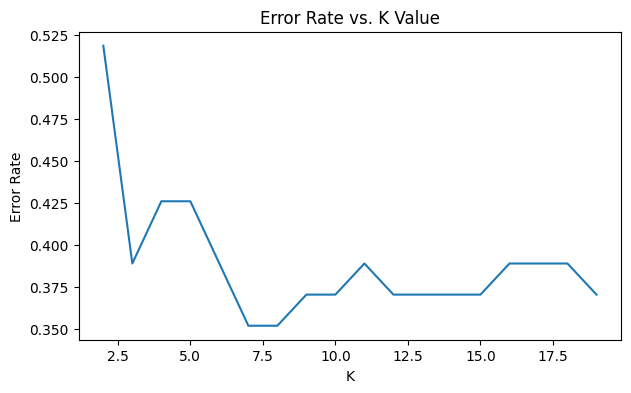

In [11]:
error_rate = []

from tqdm.notebook import tqdm
# perform elbow method to get optimal K
# run knn with k=2 to 19
for i in tqdm(range(2,20)):
    
    # build knn
    clf = KNeighborsClassifier(n_neighbors=i)
    
    # fit and predict
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # compute how many times (in percentage) y_pred is not equal to y_test
    error_rate.append(np.mean(y_pred != y_test))

# plot the graph
plt.figure(figsize=(7,4))
plt.plot(range(2,20),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# at what value of k, the error was less
# 2 is added since array index starts with 0
k_best = np.array(error_rate).argmin()+2

print("Minimum error:-",min(error_rate),'at k=',k_best)

## Question 3 [5 marks]

**Q3.1.** Read the "amphibians2.csv" into `data2` and  "amphibians1.csv" into `data1_2`. Observe any differences in the values of the feature "SR" between these two datasets, and explain why you think these changes were made (provide your hypothesis). Use diagrams such a histograms or boxplots to check the distribution of the feature 'SR' before and after the change. **[2 marks]**

In [12]:
data2 = pd.read_csv("amphibians2.csv")
data1_2 = pd.read_csv("amphibians1.csv")

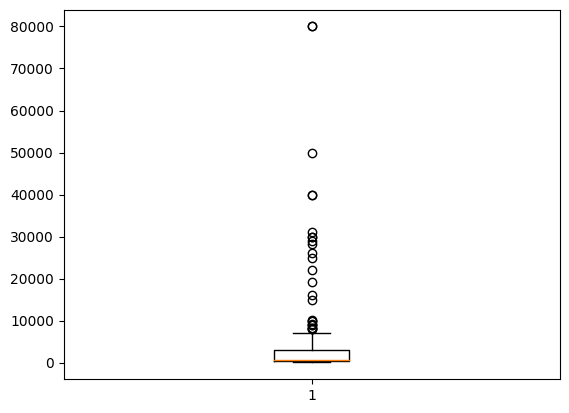

In [13]:
# your code here
plt.boxplot(data1_2['SR'])
plt.show()

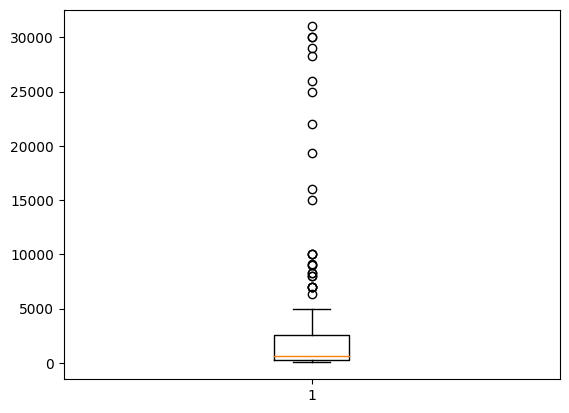

In [14]:
# your code here
plt.boxplot(data2['SR'])
plt.show()

*Answer Here*

- In previous data SR data was localized within a certain range i.e more data was within a certain range , though in the data2 it was made like F-distribution so as to get more from this feature to get robust model.

**Q3.2** 
For 10 rounds plit the `data2` and `data1_2` dataset into 70% training and 30% testing sets use the `random_state` equal to the loop counter. Train and test two **decision tree** classifier with all default hyper-parameters: one with `data1_2` and one with `data2`. Calculate and report the average accuracy of both models for 10 runs. **[1 mark]**

In [15]:
y1_2 = data1_2.iloc[:, -1]
X1_2 =  data1_2.iloc[:, :-1]

y2 = data2.iloc[:, -1]
X2 = data2.iloc[:, :-1]

In [16]:
DT_Acc_1_2 = []
DT_Acc_2 = []

# your code here
X1_2 = encode(X1_2)
X2 = encode(X2)

X1_2 = normalise(X1_2)
X2 = normalise(X2)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X1_2,y1_2,test_size=0.3,random_state=i)
    
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    dt_cr1 = classification_report(y_test, y_pred,zero_division=1)
    DT_Acc_1_2.append(acc)
    
    X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.3,random_state=i)
    
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    dt_cr2 = classification_report(y_test, y_pred,zero_division=1)
    DT_Acc_2.append(acc)
    

print("Accuracy of Decision Tree \tdata1_2:", np.mean(DT_Acc_1_2).round(2),"\tdata2:", np.mean(DT_Acc_2).round(2))

Accuracy of Decision Tree 	data1_2: 0.55 	data2: 0.53


**Q3.3** Compare and analyze the performance of the **decision tree** classifier on `data1_2` and `data2`. Discuss any differences or similarities that you observe in the performance of these models. Does the change made to the dataset improve the performance of the model? Explain why or why not and elaborate on your hypothesis from Q3.1. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

In [17]:
print('data1\n',dt_cr1)
print('data2\n',dt_cr2)

data1
                    precision    recall  f1-score   support

       Brown frog       0.40      0.44      0.42        18
      Common toad       0.20      0.50      0.29         2
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.59      0.50      0.54        32
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.46        54
        macro avg       0.24      0.29      0.25        54
     weighted avg       0.49      0.46      0.47        54

data2
                    precision    recall  f1-score   support

       Brown frog       0.62      0.42      0.50        19
      Common toad       1.00      0.20      0.33         5
Fire-bellied toad       0.00      0.00      0.00         1
       Green frog       0.59      0.74      0.66        27
        Tree frog       0.00      0.00      0.00         1

         accuracy                           0.55        53
        macro avg       0.44      0.2

*Answer Here*

- i am checking here single classification_report and found that its improving the models performance because of data distribution done in SR for data2, i.e model is not able to fetch more forecasting ability from this SR feature

## Question 4

**Q4.1** Read the "amphibians3.csv" into data3. Use histogram diagrams to compare the distribution of class labels between `data1` and `data3`. Observe the changes on the distribution of the class labels and explain in your own words why you think these changes have been made.**[2 marks]**

- Answer:
    - The classes were not balanced earlier , which is not balanced, these changes have been made so that model can get trained on equal proportion of data for all those classes

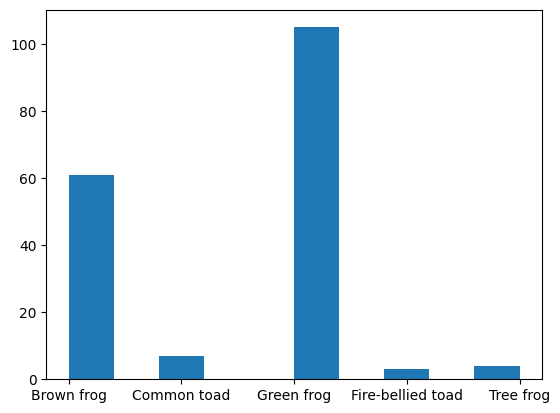

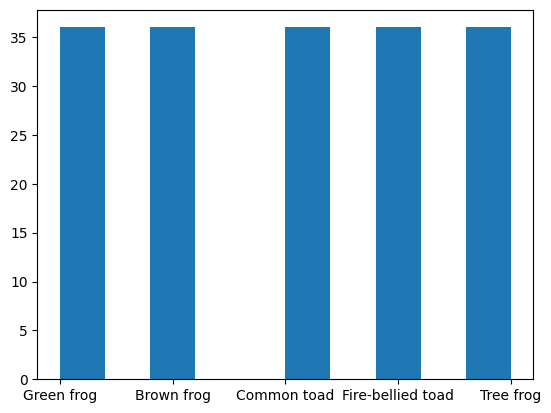

In [18]:
data3 = pd.read_csv("amphibians3.csv")

# your code here

plt.hist(data1['frog class'])
plt.show()


plt.hist(data3['frog class'])
plt.show()

**Q4.2** Use the same encoding technique as used in Q1.1 to encode the `data3` dataset and apply the same normalization technique as used in Q2.1 to normalise the data. For 10 rounds, split the encoded and normalized data3 into 70% training and 30% testing sets,  set the `random_state` equal to the loop counter. Train and test the following models using `data3`: **[1 mark]**
- Zero-R
- K-Nearest Neighbour (K = 1, 5 and 20) 

Calculate the average accuracy of the models for 10 runs and report the results.


In [19]:
y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

In [20]:
ZeroR_Acc_3 = []
KNN1_Acc_3 = []
KNN5_Acc_3 = []
KNN20_Acc_3 = []

# your code here
X3 = normalise(X3)
X3 = normalise(X3)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.3,random_state=i)
    
    ZeroR_clf = DummyClassifier(strategy="most_frequent")
    ZeroR_clf.fit(X_train, y_train)
    y_pred = ZeroR_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ZeroR_cr = classification_report(y_test, y_pred,zero_division=1)
    ZeroR_Acc_3.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN1_Acc_3.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN5_Acc_3.append(acc)
    
    knn_clf = KNeighborsClassifier(n_neighbors=20)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    KNN20_Acc_3.append(acc)



print("Accuracy of ZeroR: \tdata1:", np.mean(ZeroR_Acc_1).round(2),"\tdata3:",np.mean(ZeroR_Acc_3).round(2))
print("Accuracy of KNN(1): \tdata1:", np.mean(KNN1_Acc_2).round(2),"\tdata3:", np.mean(KNN1_Acc_3).round(2))
print("Accuracy of KNN(5): \tdata1:", np.mean(KNN5_Acc_2).round(2),"\tdata3:", np.mean(KNN5_Acc_3).round(2))
print("Accuracy of KNN(20): \tdata1:", np.mean(KNN20_Acc_2).round(2),"\tdata3:", np.mean(KNN20_Acc_3).round(2))

Accuracy of ZeroR: 	data1: 0.59 	data3: 0.14
Accuracy of KNN(1): 	data1: 0.56 	data3: 0.75
Accuracy of KNN(5): 	data1: 0.62 	data3: 0.68
Accuracy of KNN(20): 	data1: 0.62 	data3: 0.48


**Q4.3** Discuss any differences you observe between the results of these KNN classifiers on data1 (Q2.2) and data3. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.* 

  0%|          | 0/18 [00:00<?, ?it/s]

Minimum error:- 0.3333333333333333 at k= 2


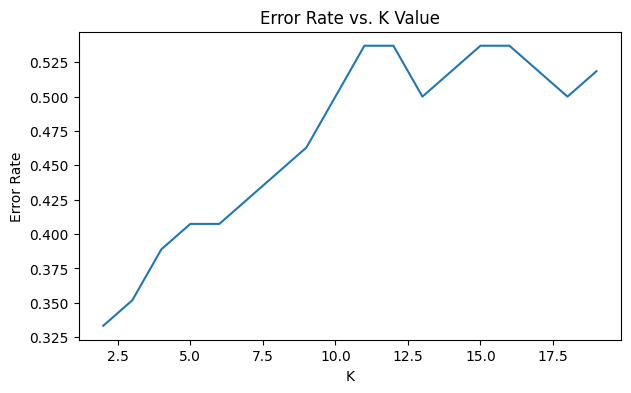

In [21]:
error_rate = []

from tqdm.notebook import tqdm
# perform elbow method to get optimal K
# run knn with k=2 to 19
for i in tqdm(range(2,20)):
    
    # build knn
    clf = KNeighborsClassifier(n_neighbors=i)
    
    # fit and predict
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # compute how many times (in percentage) y_pred is not equal to y_test
    error_rate.append(np.mean(y_pred != y_test))

# plot the graph
plt.figure(figsize=(7,4))
plt.plot(range(2,20),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# at what value of k, the error was less
# 2 is added since array index starts with 0
k_best = np.array(error_rate).argmin()+2

print("Minimum error:-",min(error_rate),'at k=',k_best)

*Answer Here*
- Using Elbow method we can see K=2 is the best, and we found that at K=1 is the highest jump in accuracy. Its is beacuse 1 is close to 2 compared to 5 and 20
- Also data3 was balanced now therefore comparing the model based on their accuracy is more appropriate here.